In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.cm as cm
from python_code import beta_binomial_model as bb
from python_code import logistic_regression as lr
from python_code import make_gifs 
from scipy.stats import beta, bernoulli

## Inferring the probability of heads "p" using binomial likelihood and beta prior

In [2]:
beta_binom_model = bb.BetaBinomial(beta_a_param=2, beta_b_param=2, n_heads=8, n_total=30, initial_probability_heads=.5)
beta_binom_model.fit()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4999/4999 [00:01<00:00, 4961.36it/s]


In [3]:
def make_analytical_posterior(a_param=2, b_param=2, n_heads=8, n_total=30):
    return beta(a=n_heads+b_param, b=b_param+n_total-n_heads)

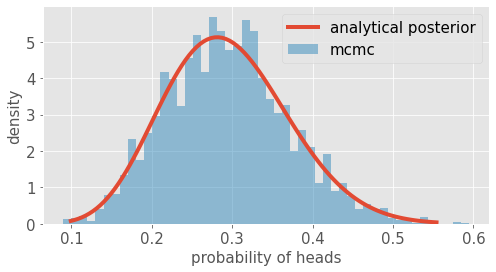

In [4]:
plt.figure(figsize=(8,4))
true_posterior_dist = make_analytical_posterior()
probability_range = np.linspace(true_posterior_dist.ppf(.001), true_posterior_dist.ppf(.999),100)
plt.plot(probability_range, true_posterior_dist.pdf(probability_range), lw=4, label='analytical posterior')
plt.hist(beta_binom_model.probability_heads_traces, bins=50,density=True, alpha=.5, label='mcmc');
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.ylabel('density', fontsize=15)
plt.xlabel('probability of heads', fontsize=15);

## Inferring $\beta$ in logistic regression

In [5]:
n_points = 100
minimum_study_hours = 0
maximum_study_hours = 10
x = np.random.uniform(minimum_study_hours, maximum_study_hours, n_points)
x_with_intercept =  np.vstack([np.ones(x.shape[0]), x]).T
beta = np.array([-3, 1])
probabilities = 1/(1+np.exp(-x_with_intercept@beta))
y = bernoulli.rvs(p=probabilities)
initial_betas = np.zeros(x_with_intercept.shape[1])

In [6]:
model = lr.BayesianLogisticRegression(x_with_intercept, y, n_iter=5000, betas_initial=initial_betas, prior_mean_betas=0, prior_std_betas=1e3)
model.fit(proposal_std=1.5)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4999/4999 [00:31<00:00, 157.19it/s]


In [7]:
model.accept_array.mean()

0.060012002400480095

/Users/juliette/Documents/repos/metropolis_hastings_tutorial/python_code/make_gifs.py:74: RuntimeWarning: divide by zero encountered in log
  plt.contourf(beta_0_grid, beta_1_grid, np.array(np.log(posteriors_betas)).reshape(n_points, n_points),
/Users/juliette/Documents/repos/metropolis_hastings_tutorial/python_code/make_gifs.py:90: RuntimeWarning: divide by zero encountered in log
  plt.contourf(beta_0_grid, beta_1_grid, np.array(np.log(posteriors_betas)).reshape(n_points, n_points),
/Users/juliette/Documents/repos/metropolis_hastings_tutorial/python_code/make_gifs.py:110: RuntimeWarning: divide by zero encountered in log
  plt.contourf(beta_0_grid, beta_1_grid, np.array(np.log(posteriors_betas)).reshape(n_points, n_points),
/Users/juliette/Documents/repos/metropolis_hastings_tutorial/python_code/make_gifs.py:74: RuntimeWarning: divide by zero encountered in log
  plt.contourf(beta_0_grid, beta_1_grid, np.array(np.log(posteriors_betas)).reshape(n_points, n_points),
/Users/juliette/Doc

/Users/juliette/Documents/repos/metropolis_hastings_tutorial/python_code/make_gifs.py:110: RuntimeWarning: divide by zero encountered in log
  plt.contourf(beta_0_grid, beta_1_grid, np.array(np.log(posteriors_betas)).reshape(n_points, n_points),
/Users/juliette/Documents/repos/metropolis_hastings_tutorial/python_code/make_gifs.py:74: RuntimeWarning: divide by zero encountered in log
  plt.contourf(beta_0_grid, beta_1_grid, np.array(np.log(posteriors_betas)).reshape(n_points, n_points),
/Users/juliette/Documents/repos/metropolis_hastings_tutorial/python_code/make_gifs.py:90: RuntimeWarning: divide by zero encountered in log
  plt.contourf(beta_0_grid, beta_1_grid, np.array(np.log(posteriors_betas)).reshape(n_points, n_points),
/Users/juliette/Documents/repos/metropolis_hastings_tutorial/python_code/make_gifs.py:110: RuntimeWarning: divide by zero encountered in log
  plt.contourf(beta_0_grid, beta_1_grid, np.array(np.log(posteriors_betas)).reshape(n_points, n_points),
/Users/juliette/Do

/Users/juliette/Documents/repos/metropolis_hastings_tutorial/python_code/make_gifs.py:74: RuntimeWarning: divide by zero encountered in log
  plt.contourf(beta_0_grid, beta_1_grid, np.array(np.log(posteriors_betas)).reshape(n_points, n_points),
/Users/juliette/Documents/repos/metropolis_hastings_tutorial/python_code/make_gifs.py:90: RuntimeWarning: divide by zero encountered in log
  plt.contourf(beta_0_grid, beta_1_grid, np.array(np.log(posteriors_betas)).reshape(n_points, n_points),
/Users/juliette/Documents/repos/metropolis_hastings_tutorial/python_code/make_gifs.py:110: RuntimeWarning: divide by zero encountered in log
  plt.contourf(beta_0_grid, beta_1_grid, np.array(np.log(posteriors_betas)).reshape(n_points, n_points),
/Users/juliette/Documents/repos/metropolis_hastings_tutorial/python_code/make_gifs.py:74: RuntimeWarning: divide by zero encountered in log
  plt.contourf(beta_0_grid, beta_1_grid, np.array(np.log(posteriors_betas)).reshape(n_points, n_points),
/Users/juliette/Doc

/Users/juliette/Documents/repos/metropolis_hastings_tutorial/python_code/make_gifs.py:90: RuntimeWarning: divide by zero encountered in log
  plt.contourf(beta_0_grid, beta_1_grid, np.array(np.log(posteriors_betas)).reshape(n_points, n_points),
/Users/juliette/Documents/repos/metropolis_hastings_tutorial/python_code/make_gifs.py:110: RuntimeWarning: divide by zero encountered in log
  plt.contourf(beta_0_grid, beta_1_grid, np.array(np.log(posteriors_betas)).reshape(n_points, n_points),
/Users/juliette/Documents/repos/metropolis_hastings_tutorial/python_code/make_gifs.py:74: RuntimeWarning: divide by zero encountered in log
  plt.contourf(beta_0_grid, beta_1_grid, np.array(np.log(posteriors_betas)).reshape(n_points, n_points),
/Users/juliette/Documents/repos/metropolis_hastings_tutorial/python_code/make_gifs.py:90: RuntimeWarning: divide by zero encountered in log
  plt.contourf(beta_0_grid, beta_1_grid, np.array(np.log(posteriors_betas)).reshape(n_points, n_points),
/Users/juliette/Doc

/Users/juliette/Documents/repos/metropolis_hastings_tutorial/python_code/make_gifs.py:110: RuntimeWarning: divide by zero encountered in log
  plt.contourf(beta_0_grid, beta_1_grid, np.array(np.log(posteriors_betas)).reshape(n_points, n_points),
/Users/juliette/Documents/repos/metropolis_hastings_tutorial/python_code/make_gifs.py:74: RuntimeWarning: divide by zero encountered in log
  plt.contourf(beta_0_grid, beta_1_grid, np.array(np.log(posteriors_betas)).reshape(n_points, n_points),
/Users/juliette/Documents/repos/metropolis_hastings_tutorial/python_code/make_gifs.py:90: RuntimeWarning: divide by zero encountered in log
  plt.contourf(beta_0_grid, beta_1_grid, np.array(np.log(posteriors_betas)).reshape(n_points, n_points),
/Users/juliette/Documents/repos/metropolis_hastings_tutorial/python_code/make_gifs.py:110: RuntimeWarning: divide by zero encountered in log
  plt.contourf(beta_0_grid, beta_1_grid, np.array(np.log(posteriors_betas)).reshape(n_points, n_points),
/Users/juliette/Do

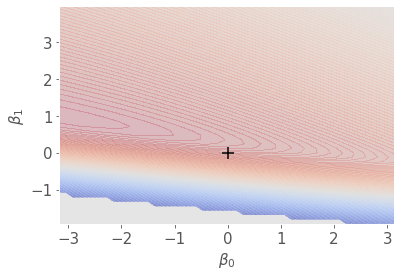

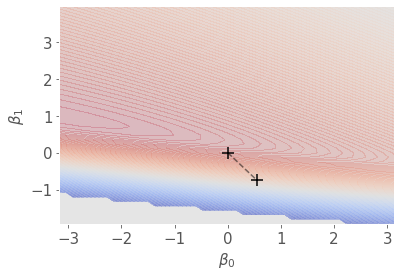

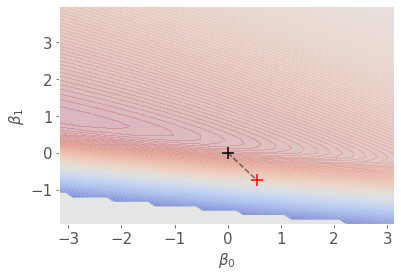

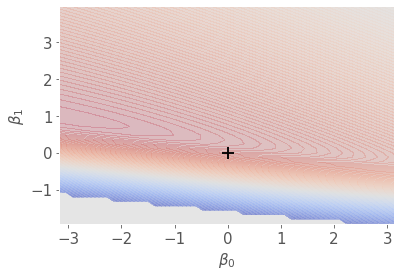

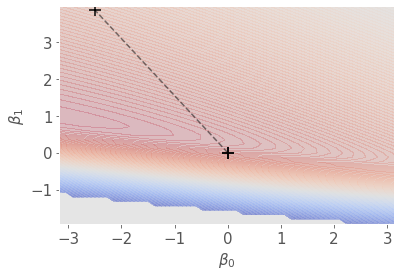

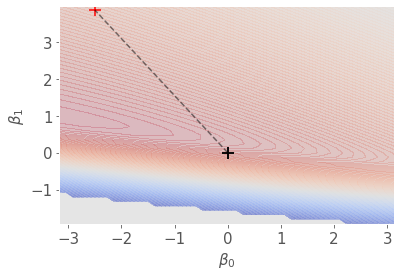

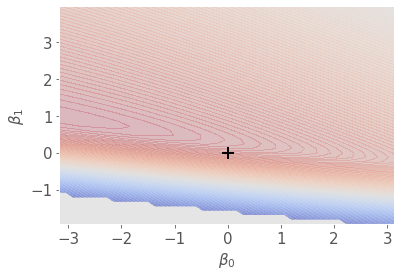

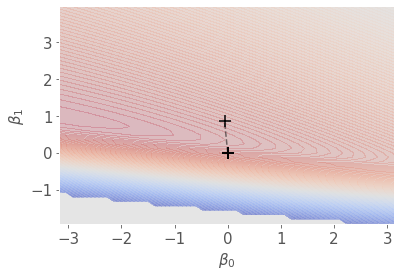

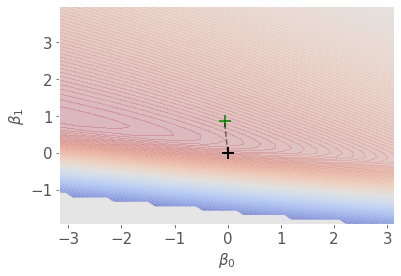

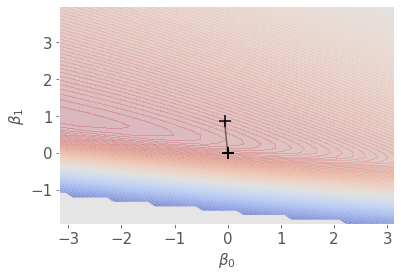

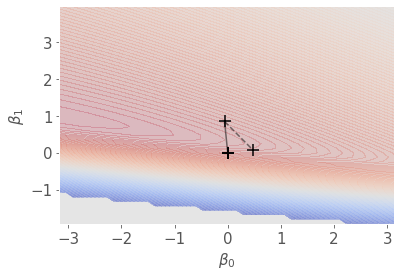

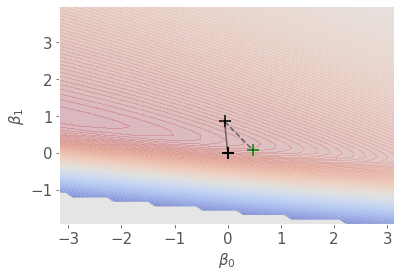

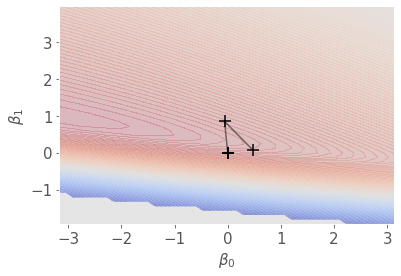

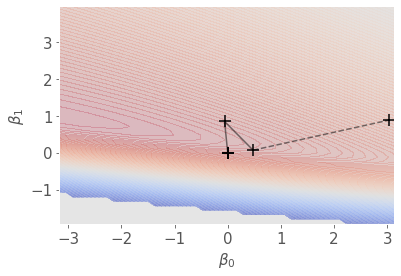

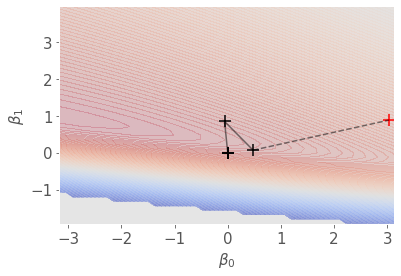

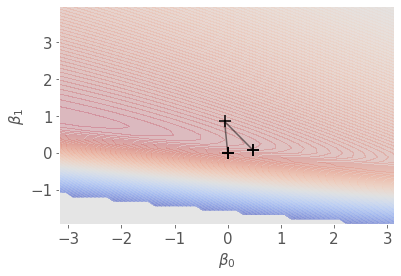

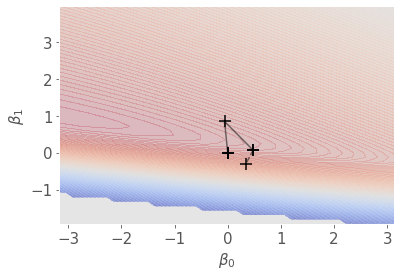

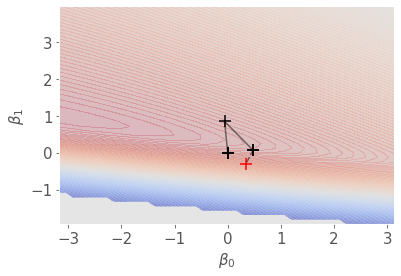

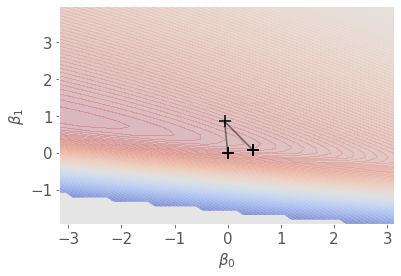

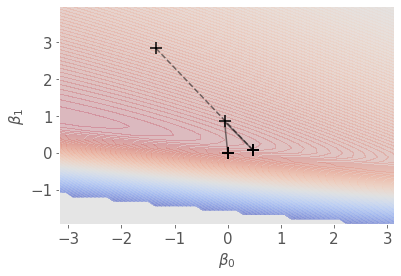

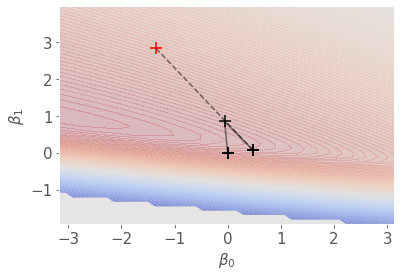

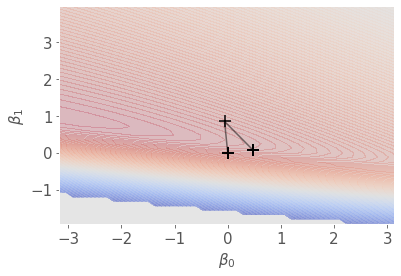

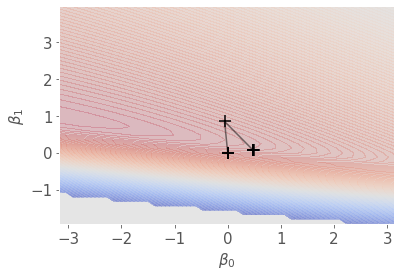

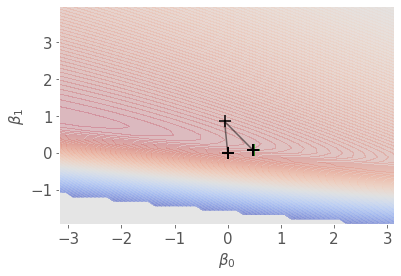

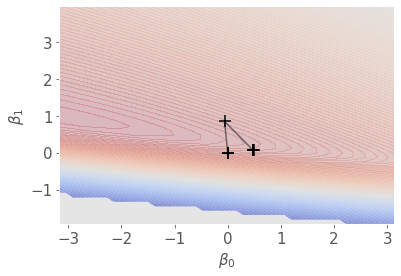

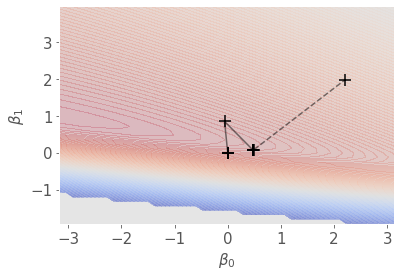

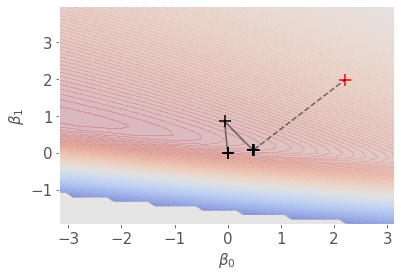

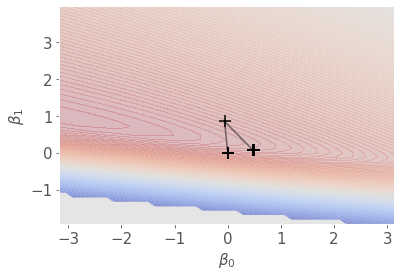

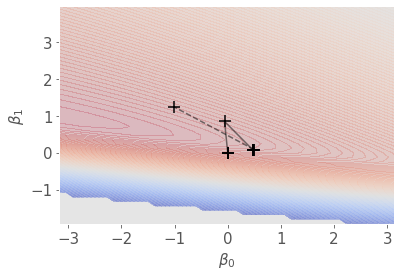

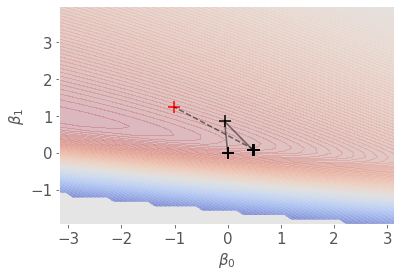

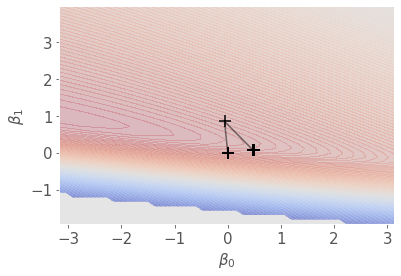

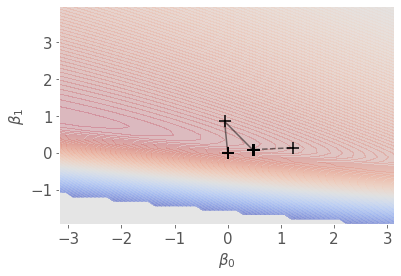

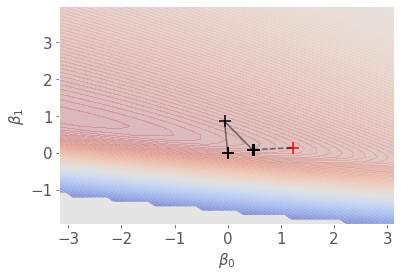

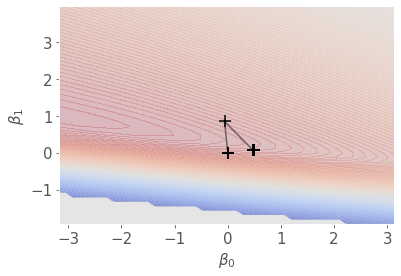

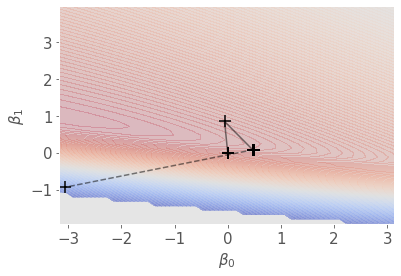

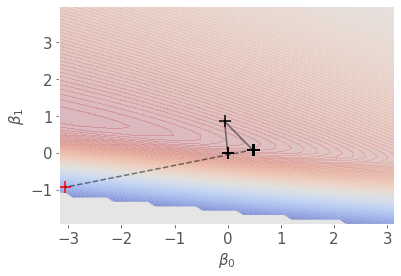

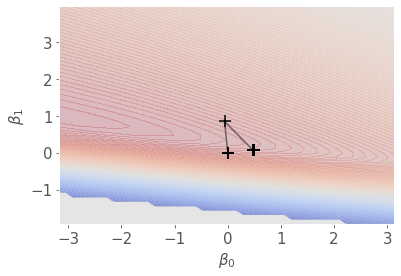

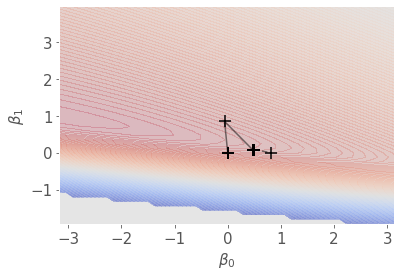

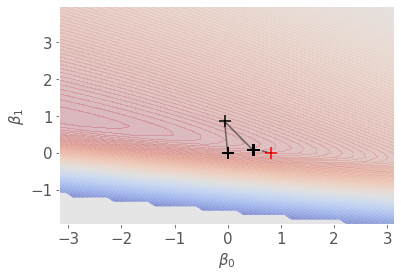

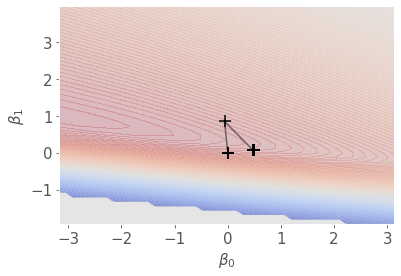

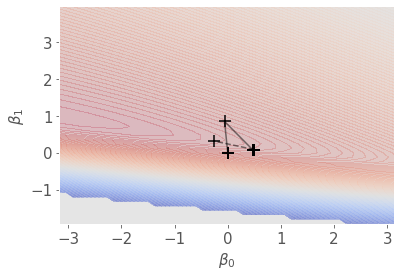

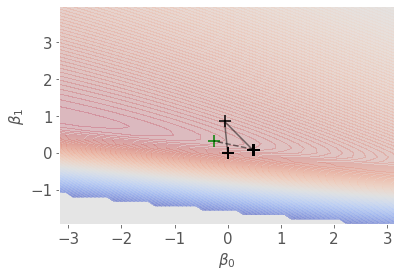

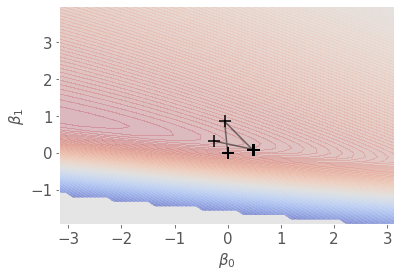

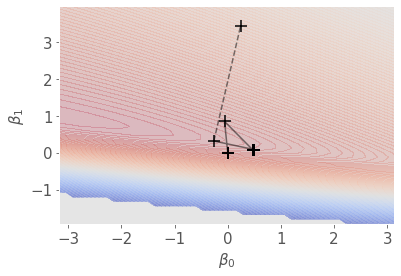

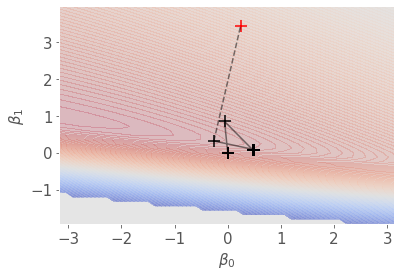

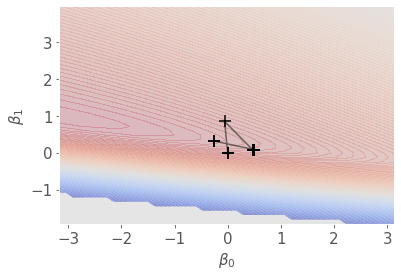

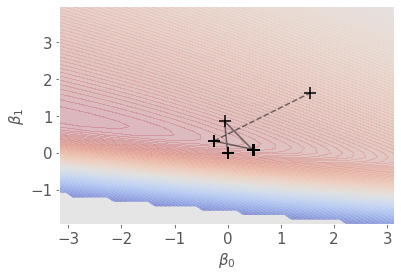

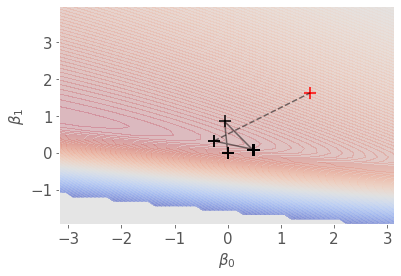

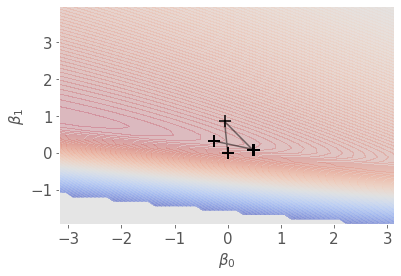

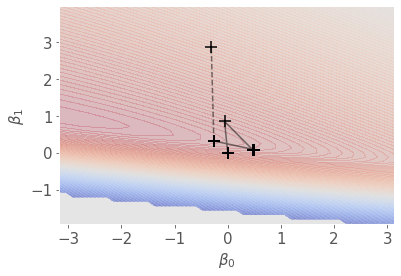

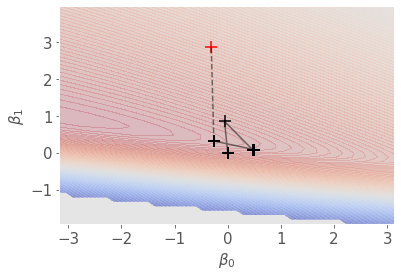

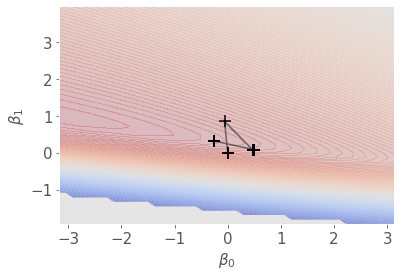

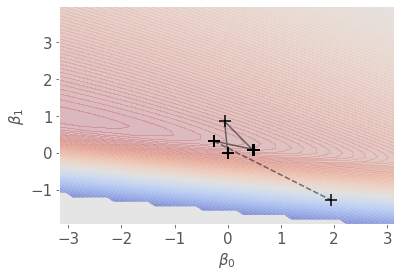

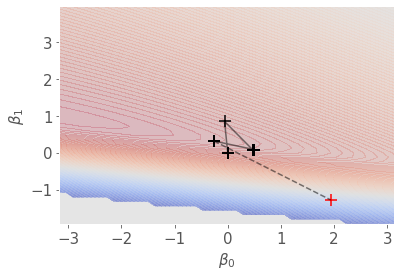

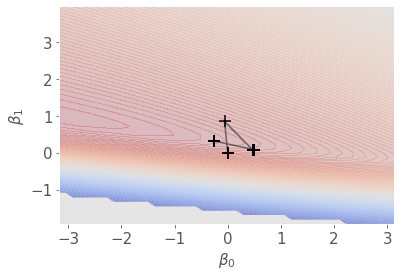

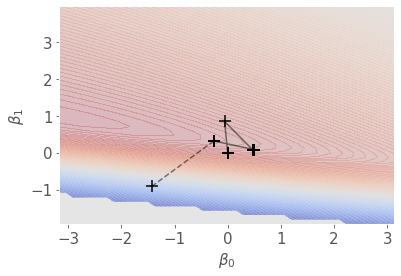

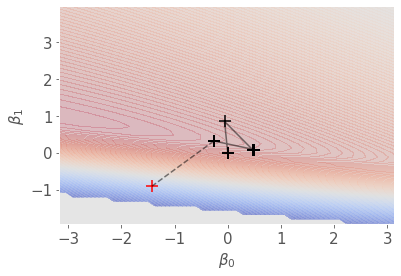

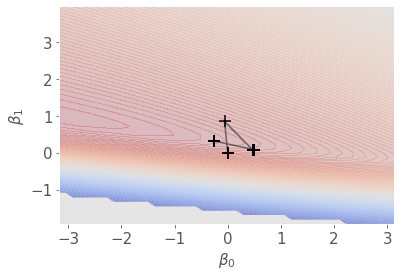

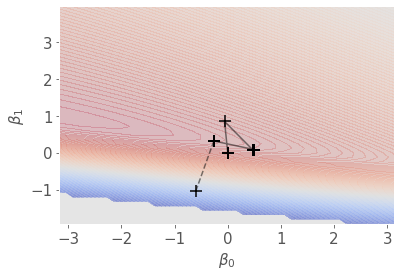

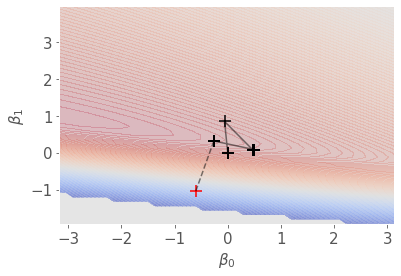

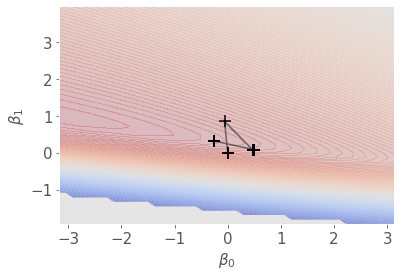

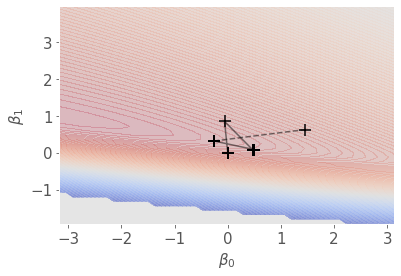

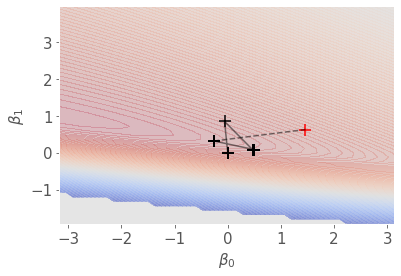

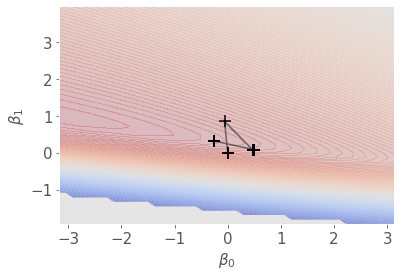

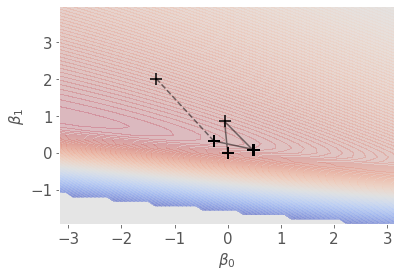

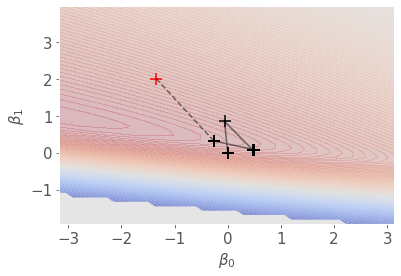

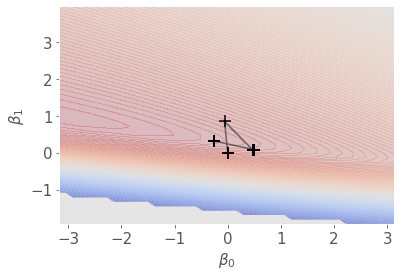

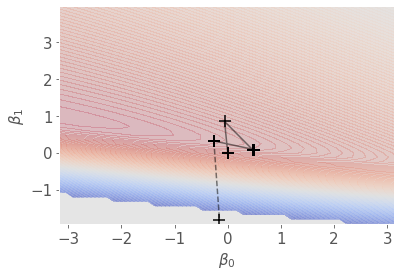

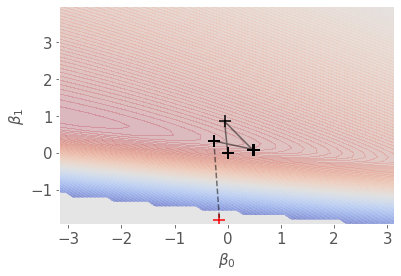

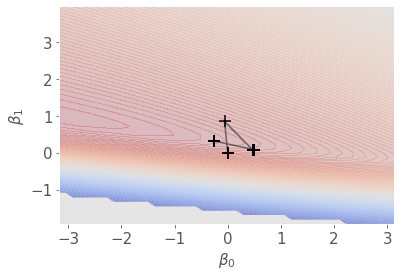

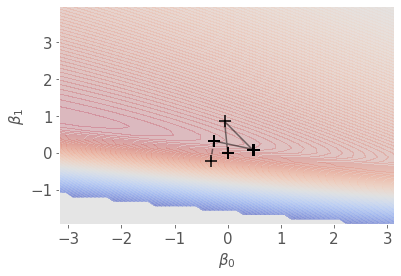

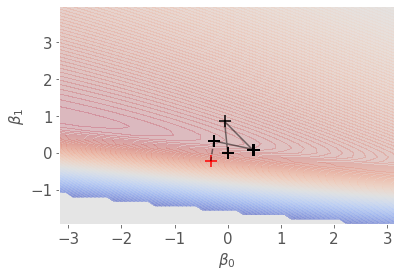

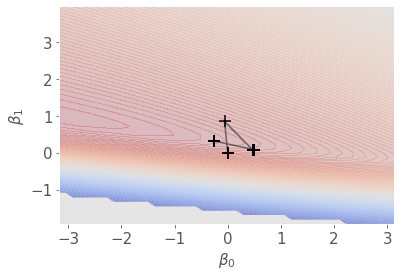

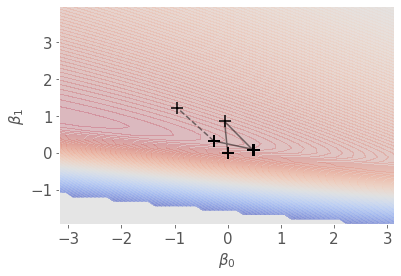

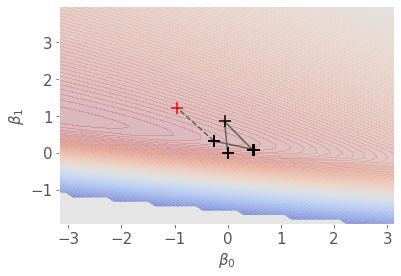

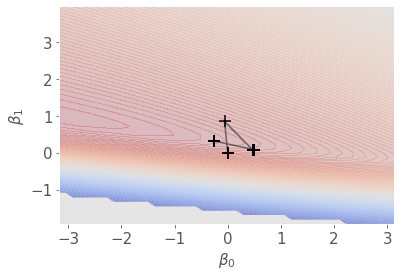

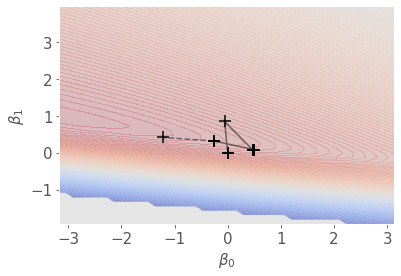

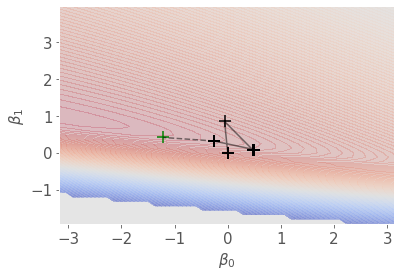

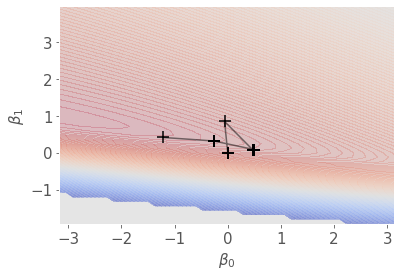

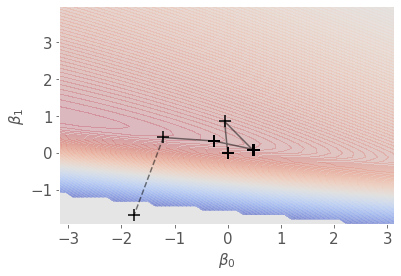

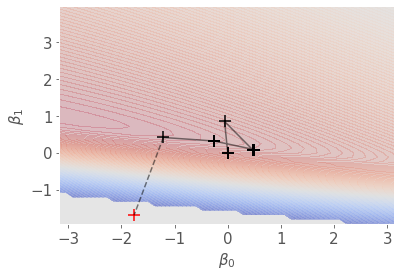

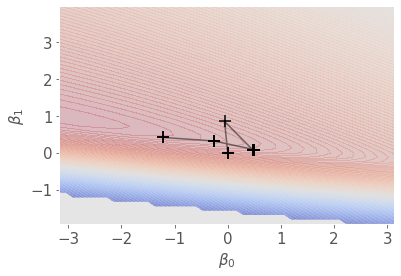

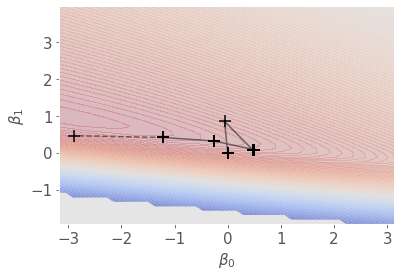

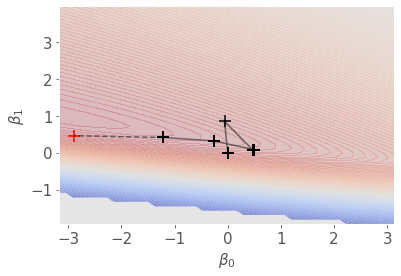

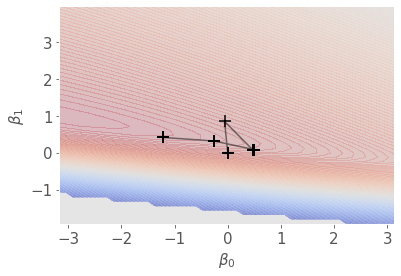

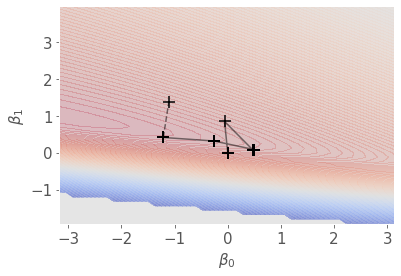

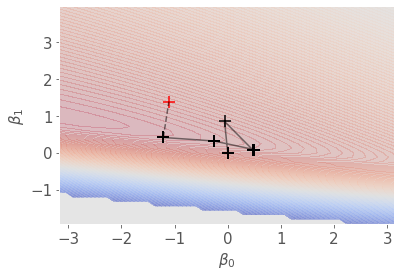

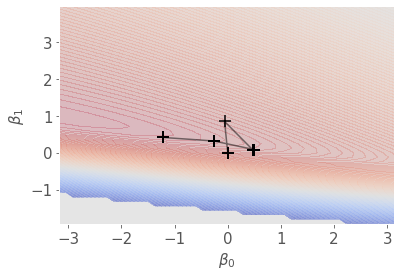

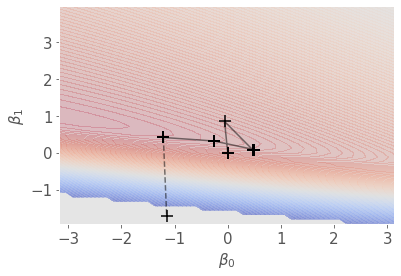

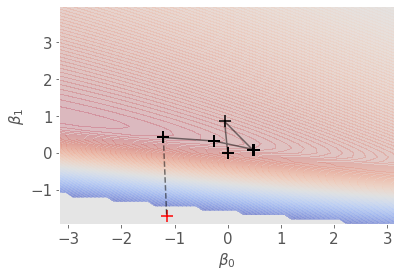

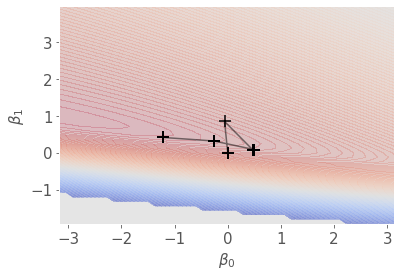

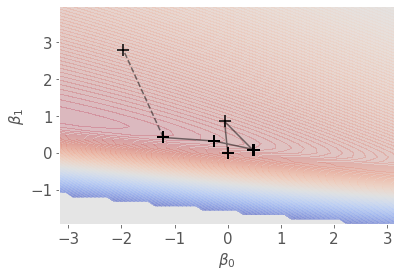

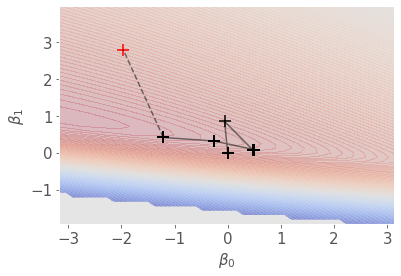

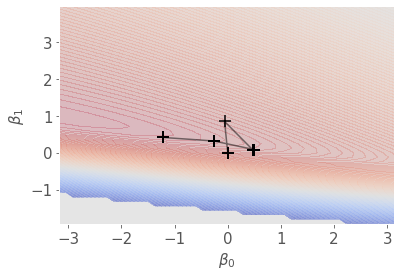

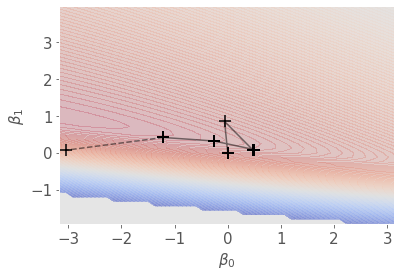

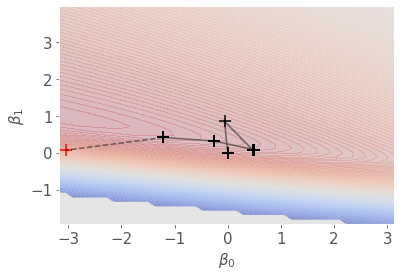

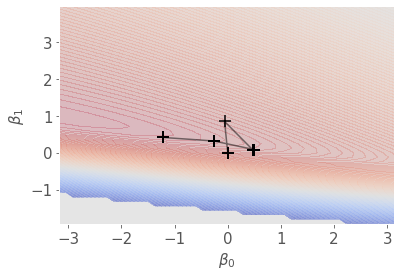

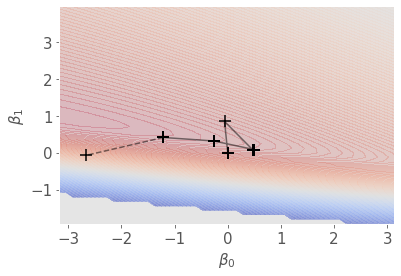

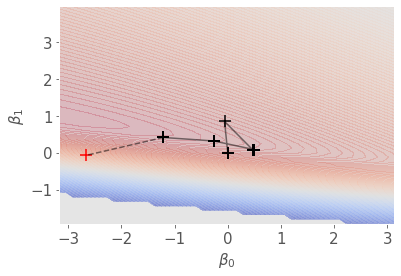

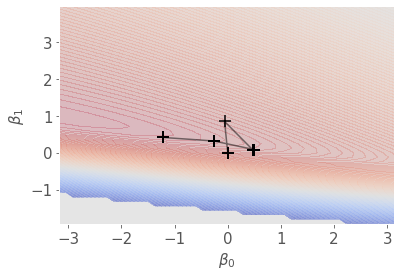

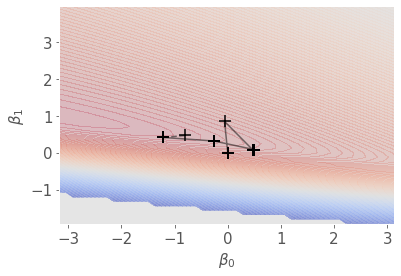

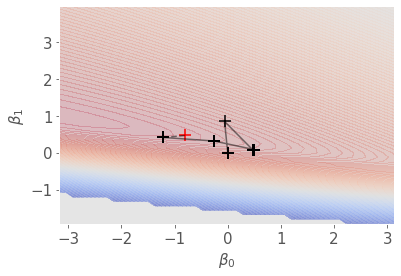

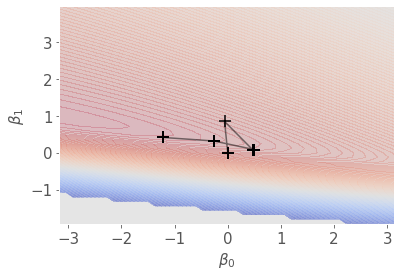

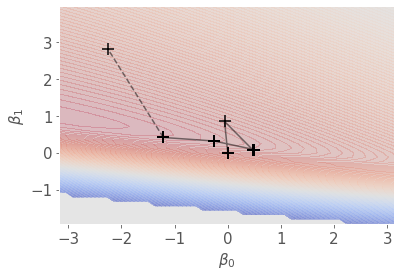

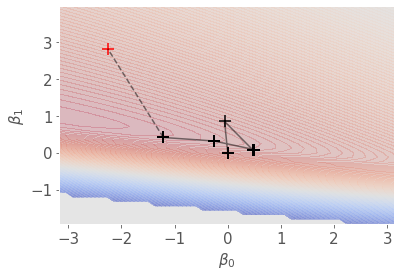

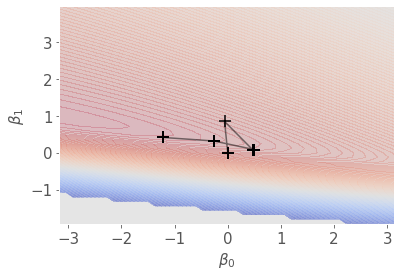

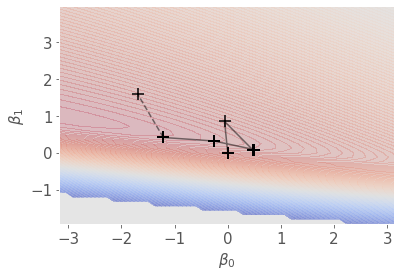

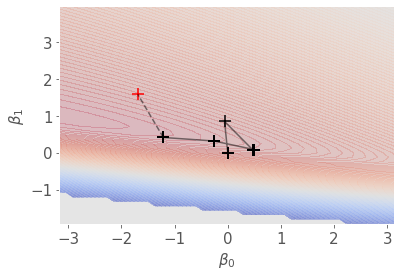

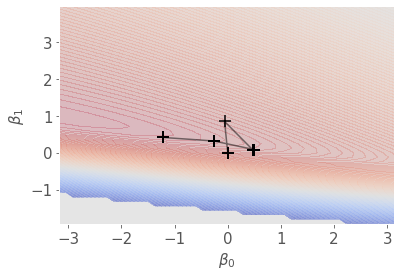

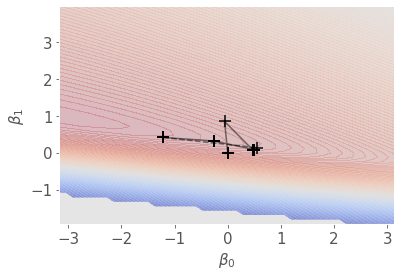

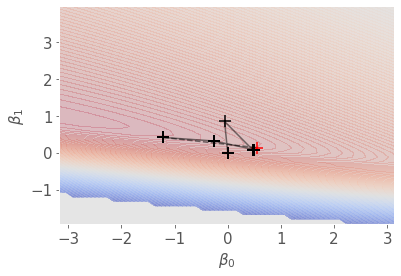

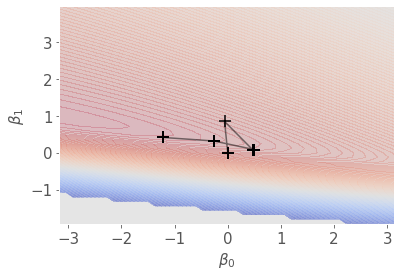

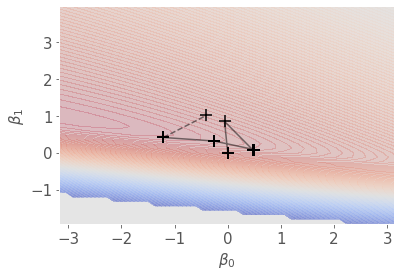

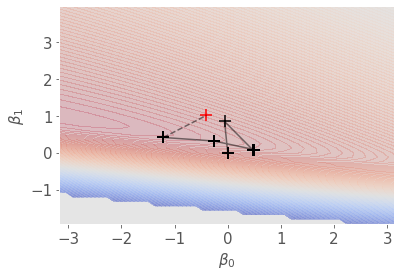

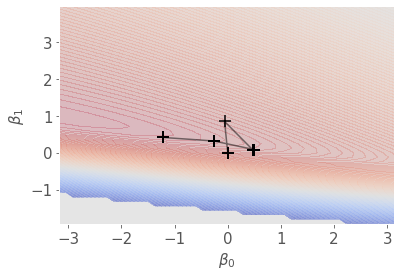

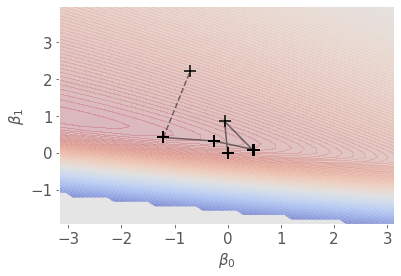

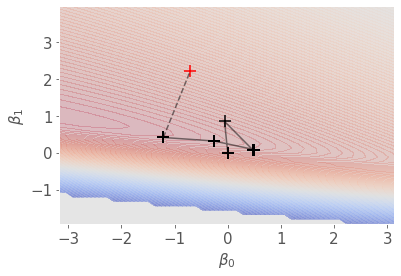

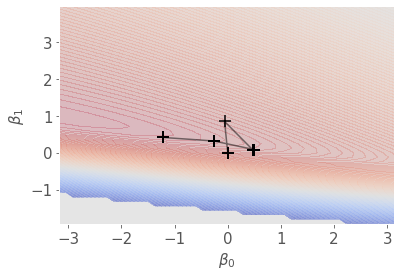

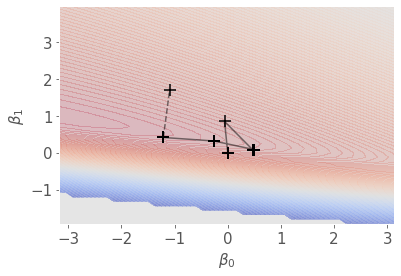

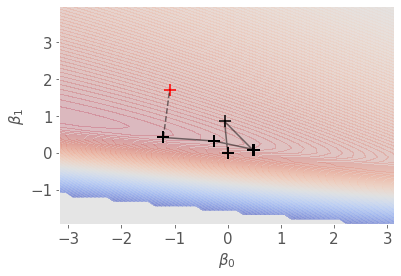

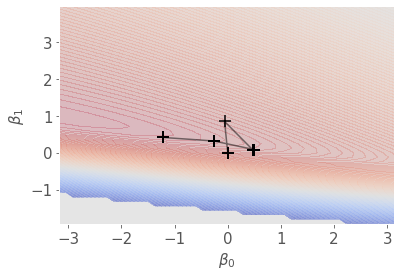

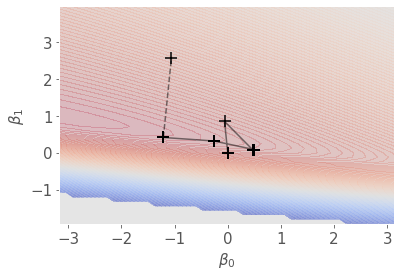

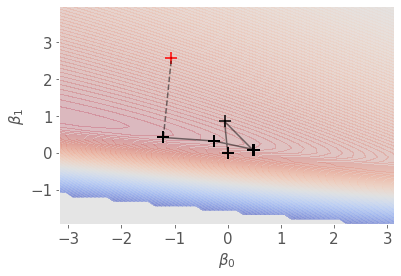

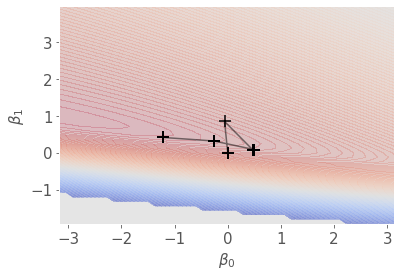

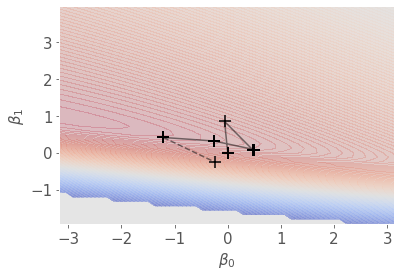

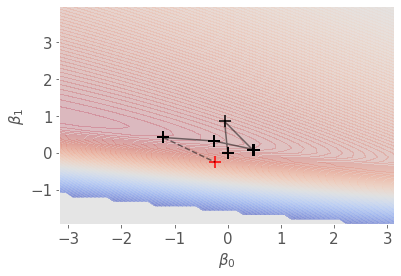

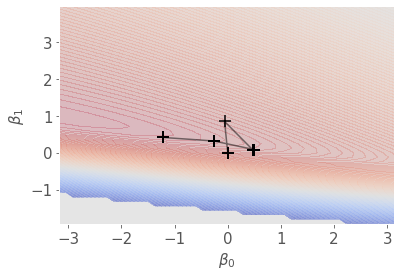

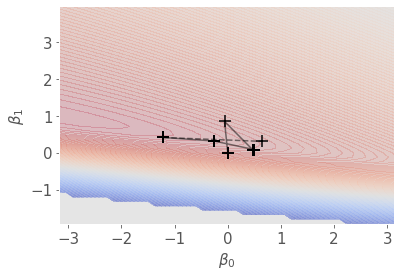

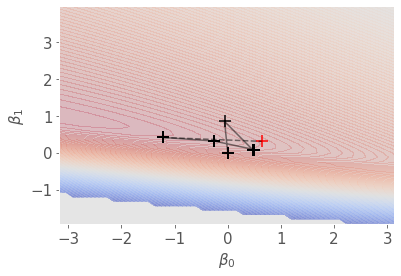

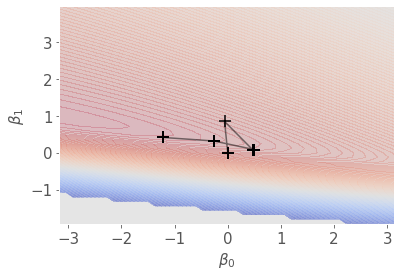

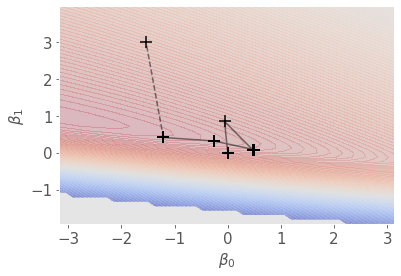

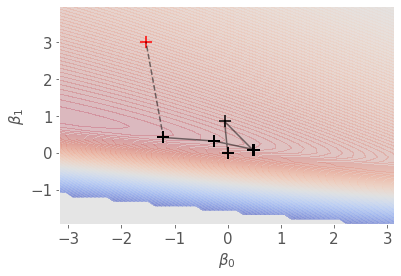

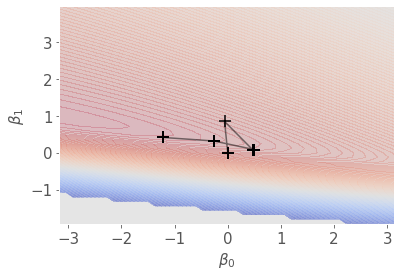

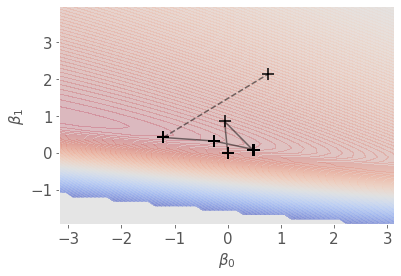

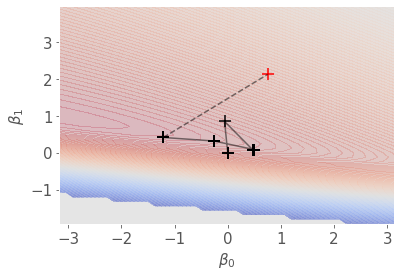

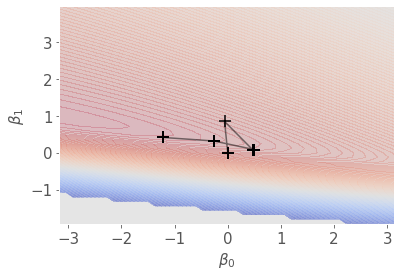

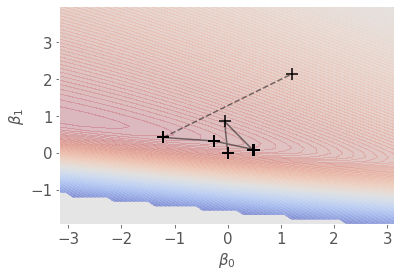

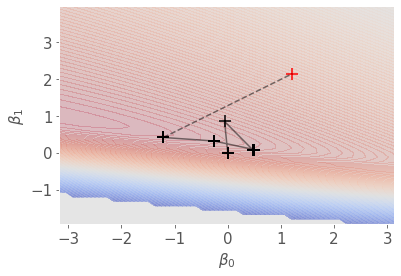

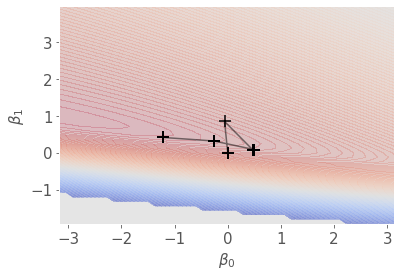

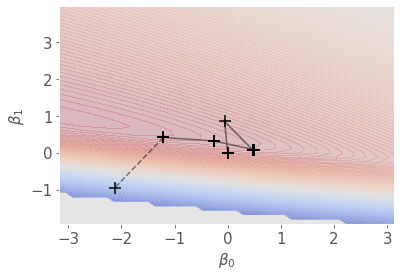

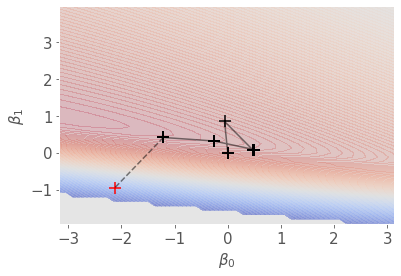

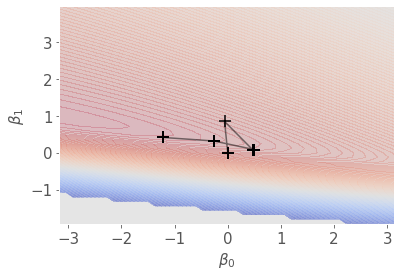

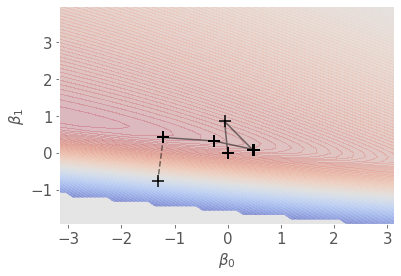

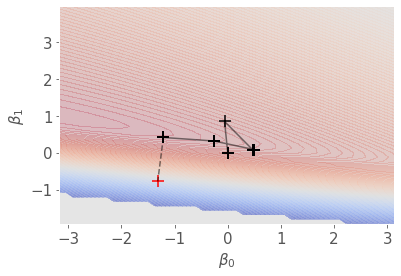

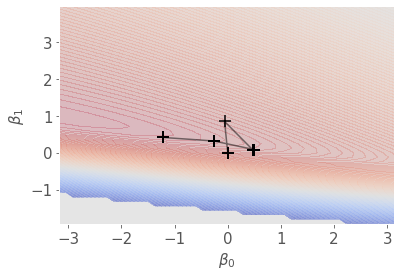

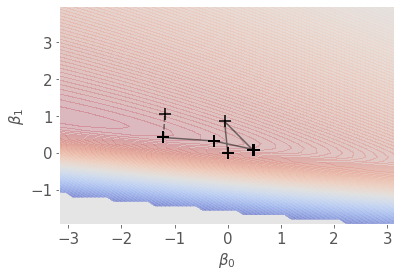

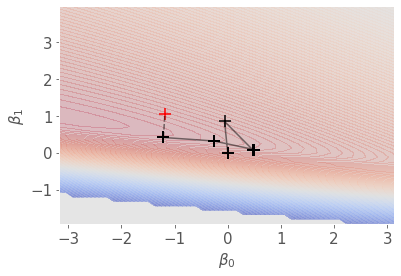

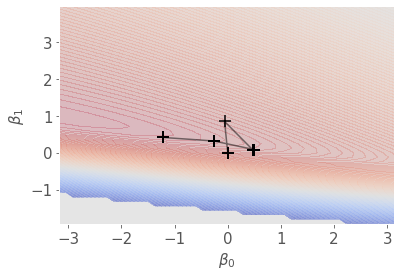

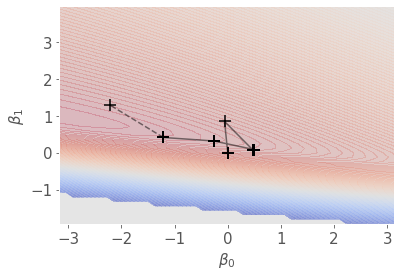

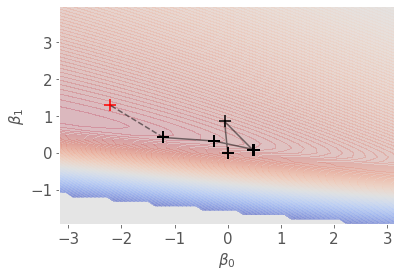

In [8]:
make_gifs.make_logistic_regression_gif(model, n_iter_plot=50, n_points=50, gif_name='logistic_regression_large_step')

In [ ]:
n_chains = 4
n_iter = 5000
models = []
for n in range(n_chains): 
    model_chain = lr.BayesianLogisticRegression(x_with_intercept, y, n_iter=5000, betas_initial=initial_betas, prior_mean_betas=0, prior_std_betas=1e3)
    model_chain.fit()
    models.append(model_chain)
    

 32%|████████████████████████████████████████████████████████████▍                                                                                                                               | 1606/4999 [00:10<00:21, 156.58it/s]

In [ ]:
plt.figure(figsize=(13, 6))
n_burn = 1000

def plot_traces(models, n_burn):
    posterior_means = np.concatenate([models[chain].betas_traces[n_burn:, :] for chain in range(n_chains)]).mean(axis=0)
    n_betas = models[0].X.shape[1]
    for coef in range(n_betas):
        plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab20c.colors[coef*4:])
        plt.subplot(2, 2, 2*coef+1)
        [plt.plot(models[chain].betas_traces[:, coef], alpha=.8) for chain in range(n_chains)]
        plt.ylabel(fr'$\beta_{coef}$', fontsize=15)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        all_traces = np.concatenate([models[chain].betas_traces[:, coef] for chain in range(n_chains)])
        max_val, min_val = np.max(all_traces), np.min(all_traces)
        plt.fill_between([0, n_burn],[min_val, min_val], [max_val, max_val], color='black',
                     alpha=0.2, label='burn in')
        plt.xlabel('iteration number', fontsize=15)
        plt.legend(fontsize=12)
        plt.subplot(2, 2, 2*coef+2)
        for chain in range(n_chains):
            plt.hist(models[chain].betas_traces[n_burn:,coef].T, alpha=.4, bins=50)
        plt.axvline(x=posterior_means[coef], color='black', alpha=.8, lw=3, linestyle=':', label='posterior mean')
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.xlabel(fr'$\beta_{coef}$', fontsize=15)
        plt.ylabel('density',fontsize=15)
        plt.legend(fontsize=12)
    plt.tight_layout()
plot_traces(models, n_burn)